### Solver API scratchbook

In [21]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt

from solvers import *
import time
from quadrature import GaussianQuadrature

In [16]:
# Optimal phases
delta_opt = np.pi
eta_opt = (3.0*np.pi)/2.0
rew_opt = np.pi/4.0

# Model params
mp = ModelParams(M=1.0, dM=1e-11, Imw=3, Rew=rew_opt, delta=delta_opt, eta=eta_opt)

In [17]:
# Set up quadrature scheme
n_kc = 5
kc_max = 10

#TODO factor out rates from quadrature class, no idea why I did it like that

# Hide annoying warning
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    quadrature = GaussianQuadrature(n_kc, 0, kc_max, mp, H=1, tot=True, qscheme="legendre")

In [24]:
# Solve equations with QuadratureSolver
solver = QuadratureSolver(quadrature,
                         model_params=mp, TF=Tsph, H=1, fixed_cutoff=1e-4, eig_cutoff=False,
                         method="Radau", ode_pars={'atol': 1e-20, 'rtol': 1e-4}, source_term=True)

start = time.time()
solver.solve(eigvals=True)
end = time.time()
bau = (28./79.) * solver.get_final_lepton_asymmetry()
print("Time (solve): {}, BAU = {}".format(end - start, bau))

Time (solve): 3.535999298095703, BAU = 1.4901350101902378e-09


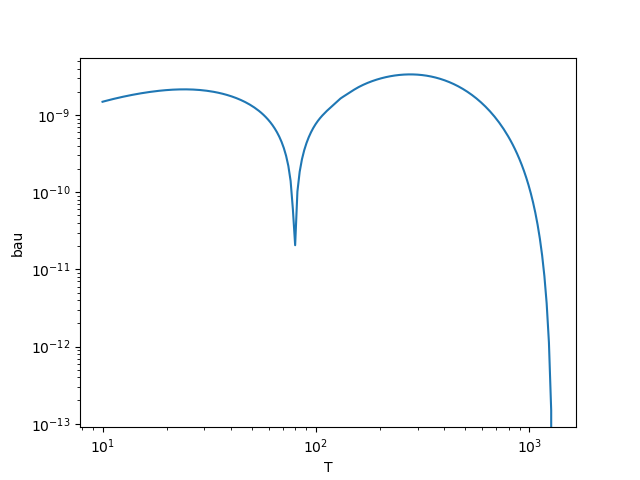

In [25]:
# Plot BAU generation
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
plt.xlabel("T")
plt.ylabel("bau")
plt.xscale("log")
plt.yscale("log")
plt.plot(solver.get_Tlist(), (28./79.) * np.abs(np.array(solver.get_total_lepton_asymmetry())))